# Gym Program Churn Prediction

Model Fitness is a gym chain and we are tasked with predicting their churn rate for the next month. Our client wishes to implement a customer interaction strategy based on analytical data.

In this project, we will predict predict the probability of churn (for the upcoming month) for each customer. We'll also draw up typical user portraits, identify target groups, select the most outstanding groups and describe their main features.

Furthermore, we will analyze the factors that impact churn most, draw conclusions and develop recommendations on how to improve customer service to cut churn.

# Table of Contents
[1 Open the data file and have a look at the general information](#1heading)  
&emsp;[1.1 Conclusion](#1.1heading)  
[2 Data preprocessing](#2heading)  
&emsp;[2.1 Processing missing values](#2.1heading)  
&emsp;[2.2 Data type replacement](#2.2heading)  
&emsp;[2.3 Processing duplicates](#2.3heading)  
[3 Exploratory Data Analysis](#3heading)  
[4 Model to predict User Churn](#4heading)  
[5 Model to create User Clusters](#5heading)  
[6 Conclusions and Recommendations](#5heading)

<a id='1heading'></a>

## Open the data files and have a look at the general information

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
import datetime as dt
from math import factorial
from scipy import stats as st
from functools import reduce

In [2]:
# Read file
churn_data = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
# Check churn_data dataframe and the data info
display(churn_data.head())
churn_data.info()
churn_data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


<a id='1.1heading'></a>

### Conclusion

<div class="alert alert-info">
    
churn_data dataframe contains 13 columns:
- **gender**: user's gender
- **Near_Location**: whether the user lives or works in the neighborhood where the gym is located
- **Partner**: whether the user is an employee of a partner company
- **Promo_friends**: whether the user originally signed up through a "bring a friend" offer
- **Phone**: whether the user provided their phone number
- **Contract_period**: 1 month, 3 months, 6 months, or 1 year
- **Group_visits**: whether the user takes part in group sessions
- **Age**: user's age
- **Avg_additional_charges_total**: he total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.
- **Month_to_end_contract**: the months remaining until the contract expires
- **Avg_class_frequency_total**: average frequency of visits per week over the customer's lifetime
- **Avg_class_frequency_current_month**: average frequency of visits per week over the preceding month
- **Churn**: the fact of churn for the month in question

There are a total of 4000 rows with 0 nulls. Data types need updating.
</div>

<a id='2heading'></a>

## Data preprocessing

<a id='2.1heading'></a>

### Processing missing values

In [4]:
# Percentage of nulls
churn_data.isnull().sum()*100/len(churn_data)

gender                               0.0
Near_Location                        0.0
Partner                              0.0
Promo_friends                        0.0
Phone                                0.0
Contract_period                      0.0
Group_visits                         0.0
Age                                  0.0
Avg_additional_charges_total         0.0
Month_to_end_contract                0.0
Lifetime                             0.0
Avg_class_frequency_total            0.0
Avg_class_frequency_current_month    0.0
Churn                                0.0
dtype: float64

<a id='2.2heading'></a>

### Data type replacement

In [5]:
# Check visits dtypes
churn_data.dtypes

gender                                 int64
Near_Location                          int64
Partner                                int64
Promo_friends                          int64
Phone                                  int64
Contract_period                        int64
Group_visits                           int64
Age                                    int64
Avg_additional_charges_total         float64
Month_to_end_contract                float64
Lifetime                               int64
Avg_class_frequency_total            float64
Avg_class_frequency_current_month    float64
Churn                                  int64
dtype: object

In [6]:
# Change dtypes
churn_data['gender'] = churn_data['gender'].astype('bool')
churn_data['Near_Location'] = churn_data['Near_Location'].astype('bool')
churn_data['Partner'] = churn_data['Partner'].astype('bool')
churn_data['Promo_friends'] = churn_data['Promo_friends'].astype('bool')
churn_data['Phone'] = churn_data['Phone'].astype('bool')
# churn_data['Contract_period'] = churn_data['Contract_period'].astype('category')
churn_data['Group_visits'] = churn_data['Group_visits'].astype('bool')
churn_data['Month_to_end_contract'] = churn_data['Month_to_end_contract'].astype('int')
churn_data['Churn'] = churn_data['Churn'].astype('bool')


In [7]:
# Confirm new dtypes
churn_data.dtypes

gender                                  bool
Near_Location                           bool
Partner                                 bool
Promo_friends                           bool
Phone                                   bool
Contract_period                        int64
Group_visits                            bool
Age                                    int64
Avg_additional_charges_total         float64
Month_to_end_contract                  int64
Lifetime                               int64
Avg_class_frequency_total            float64
Avg_class_frequency_current_month    float64
Churn                                   bool
dtype: object

<a id='2.3heading'></a>

### Processing duplicates

In [8]:
# Duplicates for churn_data
churn_data.duplicated().sum()

0

<div class="alert alert-info">
We've successfully accounted for any missing values, wrong data types and duplicate values.
</div>

<a id='3heading'></a>

## Exploratory Data Analysis

In [9]:
# Looking at distributions for all features
churn_data.describe()

,Contract_period,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,4.681250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052
std,4.549706,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906
min,1.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000
25%,1.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003
50%,1.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574
75%,6.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336
max,12.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783


<div class="alert alert-info">
    
We deduce the following after seeing our features' distributions:
- More than half of clients opt for a 1 month contract
- Our users' age starts from 18 and ends at 41
- Median additional charges amount to $136
- 50\% of our customers have a lifetime of 1-5 months
- 50\% of customer go, on average, less than twice a week to the gym

</div>

In [10]:
# Grouping by churn, and obtaining mean of all features
churn_grouping = churn_data.groupby('Churn').mean()
churn_grouping

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
False,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
True,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


<div class="alert alert-info">
    
After grouping by churn category, we can see that features **Promo_friends, Contract_period, Group_visits, Age, Avg_additional_charges_total, Month_to_end_contract, Lifetime and Avg_class_frequency_total** tend to be higher for users who decided to stay.
    
</div>

In [11]:
# Querying data by either Churn 0 or 1
churn_data_stayed = churn_data.query('Churn == 0')
churn_data_left = churn_data.query('Churn == 1')

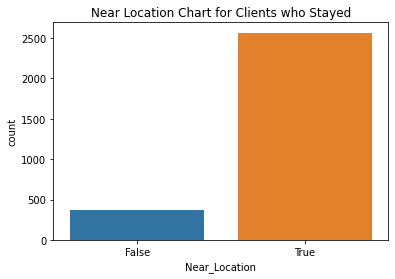

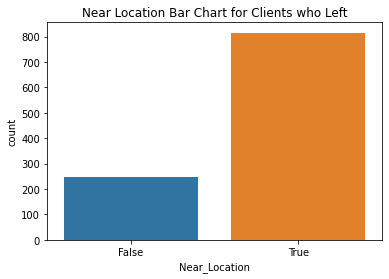

In [12]:
# Bar chart for Near_Location
sns.countplot(data=churn_data_stayed, x='Near_Location')
plt.title('Near Location Chart for Clients who Stayed')
plt.show()

sns.countplot(data=churn_data_left, x='Near_Location')
plt.title('Near Location Bar Chart for Clients who Left')
plt.show()

<div class="alert alert-info">

Clients who stayed tend to be closer to the gym's location than those who left.

</div>

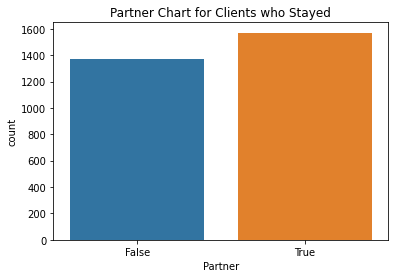

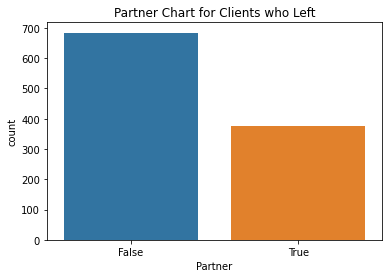

In [13]:
# Bar chart for Partner
sns.countplot(data=churn_data_stayed, x='Partner')
plt.title('Partner Chart for Clients who Stayed')
plt.show()

sns.countplot(data=churn_data_left, x='Partner')
plt.title('Partner Chart for Clients who Left')
plt.show()

<div class="alert alert-info">

Clients who stayed have a major tendency to be part of a partner company.

</div>

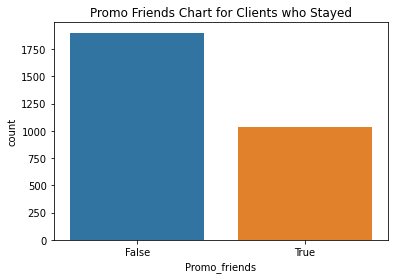

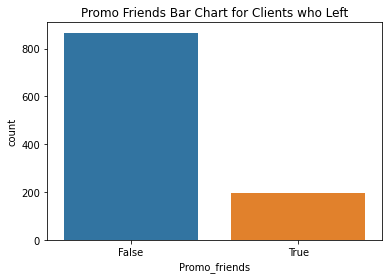

In [14]:
# Bar chart for Promo_friends
sns.countplot(data=churn_data_stayed, x='Promo_friends')
plt.title('Promo Friends Chart for Clients who Stayed')
plt.show()

sns.countplot(data=churn_data_left, x='Promo_friends')
plt.title('Promo Friends Bar Chart for Clients who Left')
plt.show()

<div class="alert alert-info">

Clients who stayed tend to sign up with a "bring a friend" offer.

</div>

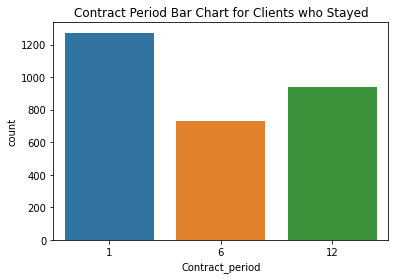

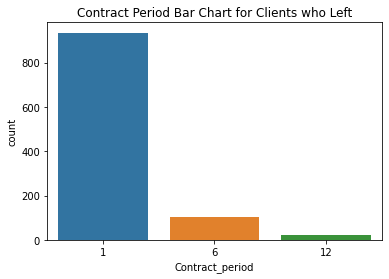

In [15]:
# Bar chart for Contract_period
sns.countplot(data=churn_data_stayed, x='Contract_period')
plt.title('Contract Period Bar Chart for Clients who Stayed')
plt.show()

sns.countplot(data=churn_data_left, x='Contract_period')
plt.title('Contract Period Bar Chart for Clients who Left')
plt.show()

<div class="alert alert-info">

Clients who stayed tend to opt for longer contracts.

</div>

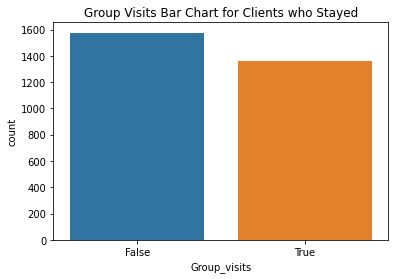

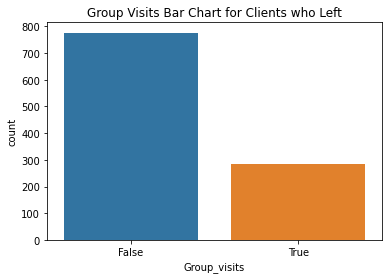

In [16]:
# Bar chart for Group_visits
sns.countplot(data=churn_data_stayed, x='Group_visits')
plt.title('Group Visits Bar Chart for Clients who Stayed')
plt.show()

sns.countplot(data=churn_data_left, x='Group_visits')
plt.title('Group Visits Bar Chart for Clients who Left')
plt.show()

<div class="alert alert-info">

Since our clients who stayed tend to have longer contracts, they also tend to have a higher amount of months for their contracts to end.

</div>

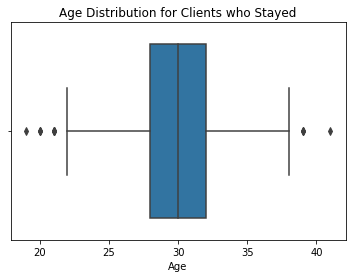

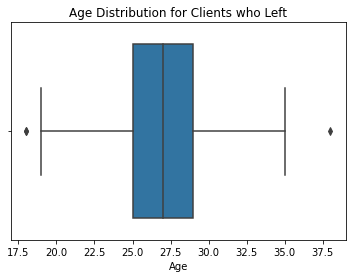

In [17]:
# Boxplot plots for age
sns.boxplot(data=churn_data_stayed, x='Age')
plt.title('Age Distribution for Clients who Stayed')
plt.show()

sns.boxplot(data=churn_data_left, x='Age')
plt.title('Age Distribution for Clients who Left')
plt.show()

<div class="alert alert-info">

Clients who stayed tend to be of an older demographic, but the difference is marginal.

</div>

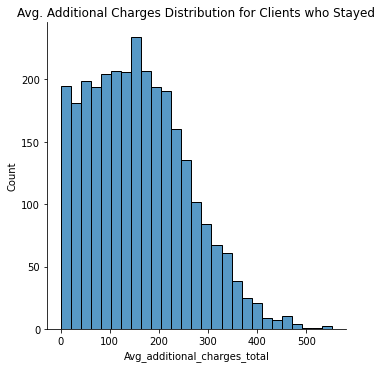

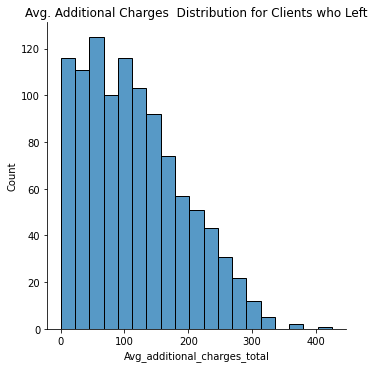

In [18]:
# Distribution plots for age
sns.displot(churn_data_stayed['Avg_additional_charges_total'])
plt.title('Avg. Additional Charges Distribution for Clients who Stayed')
plt.show()

sns.displot(churn_data_left['Avg_additional_charges_total'])
plt.title('Avg. Additional Charges  Distribution for Clients who Left')
plt.show()

<div class="alert alert-info">

As concluded when we analyzed averages, people who stayed tend to spend more on additional charges.

</div>

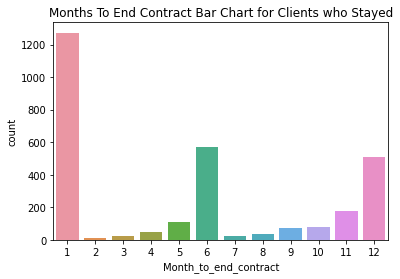

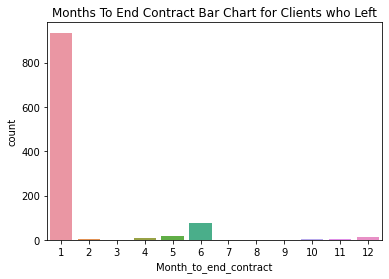

In [19]:
# Bar chart for Month_to_end_contract
sns.countplot(data=churn_data_stayed, x='Month_to_end_contract')
plt.title('Months To End Contract Bar Chart for Clients who Stayed')
plt.show()

sns.countplot(data=churn_data_left, x='Month_to_end_contract')
plt.title('Months To End Contract Bar Chart for Clients who Left')
plt.show()

<div class="alert alert-info">

Since our clients who stayed tend to have longer contracts, they also tend to have a higher amount of months for their contracts to end.

</div>

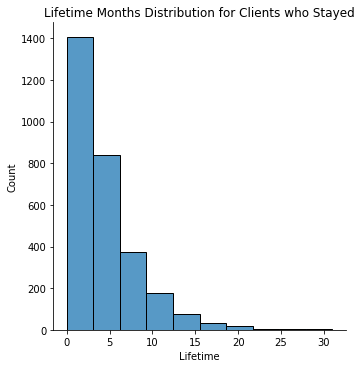

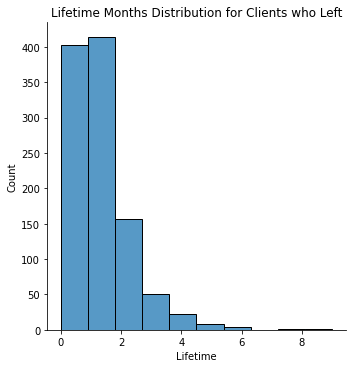

In [20]:
# Distribution plots for Lifetime
sns.displot(churn_data_stayed['Lifetime'], bins = 10)
plt.title('Lifetime Months Distribution for Clients who Stayed')
plt.show()

sns.displot(churn_data_left['Lifetime'], bins = 10)
plt.title('Lifetime Months Distribution for Clients who Left')
plt.show()

<div class="alert alert-info">
    
Clients who stayed tend to have a longer customer lifetime.

</div>

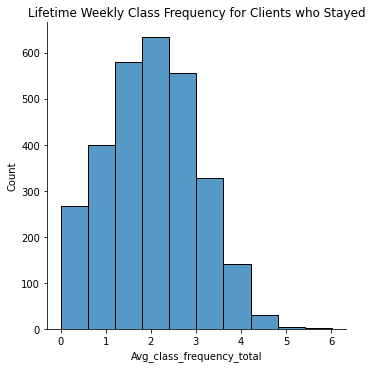

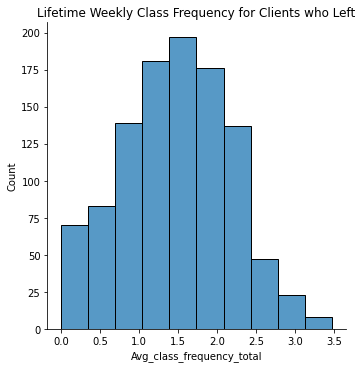

In [21]:
# Distribution plots for Avg_class_frequency_total
# Average frequency of visits per week over the customer's lifetime
sns.displot(churn_data_stayed['Avg_class_frequency_total'], bins = 10)
plt.title('Lifetime Weekly Class Frequency for Clients who Stayed')
plt.show()

sns.displot(churn_data_left['Avg_class_frequency_total'], bins = 10)
plt.title('Lifetime Weekly Class Frequency for Clients who Left')
plt.show()

<div class="alert alert-info">
    
Clients who stayed tend go more times a week than those who left during their lifetime.

</div>

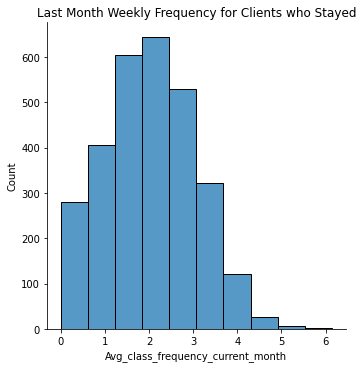

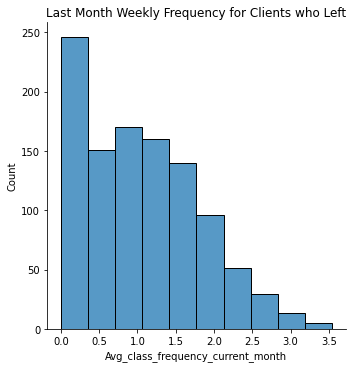

In [22]:
# Distribution plots for Avg_class_frequency_current_month
# average frequency of visits per week over the preceding month
sns.displot(churn_data_stayed['Avg_class_frequency_current_month'], bins = 10)
plt.title('Last Month Weekly Frequency for Clients who Stayed')
plt.show()

sns.displot(churn_data_left['Avg_class_frequency_current_month'], bins = 10)
plt.title('Last Month Weekly Frequency for Clients who Left')
plt.show()

<div class="alert alert-info">
    
Clients who stayed tend go more times a week in their last month than those who left.

</div>

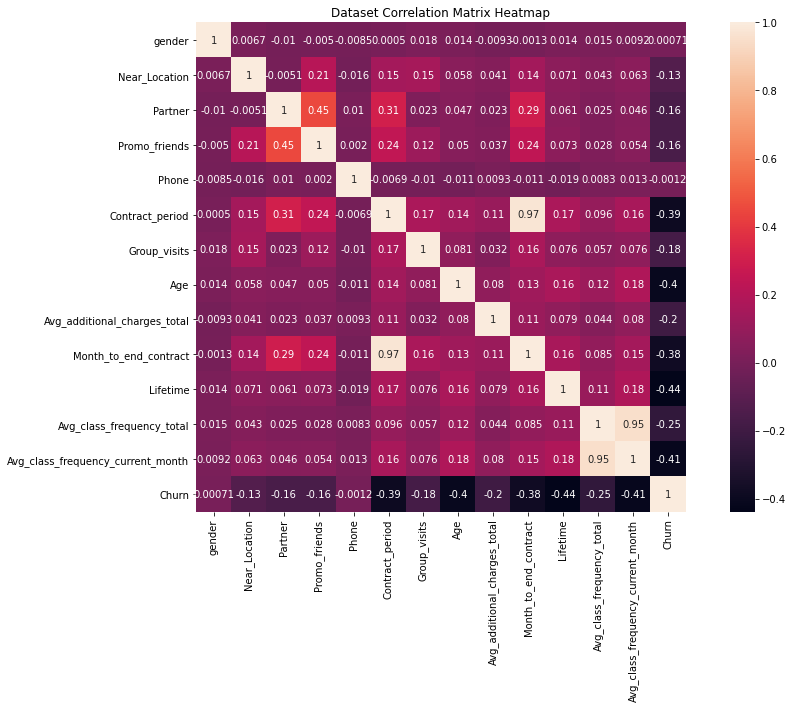

In [23]:
# Builing correlation matrix
corr_m = churn_data.corr(method = 'pearson', min_periods = 1)

# Plotting a heatmap
plt.figure(figsize=(16,9))
plt.title('Dataset Correlation Matrix Heatmap')
sns.heatmap(corr_m, square=True, annot=True)
plt.show()

<div class="alert alert-info">
    
Matrix conclusions (Pearson Coefficients of higher than 0.3 are considered relevant):
- **Gender**, **Near_location**, **Phone**, **Group_visits**, and **Avg_additional_charges_total** are not correlated with any variable
- **Partner** is positively correlated with **Promo_friends**
- **Contract_period** almost has a correlation value of 1 with **Month_to_end_contract**
- **Avg_class_frequency_total** almost has a correlation value of 1 with **Avg_class_frequency_month**
- **Churn** is negatively correlated with **Contract_period**, **Age**, **Month_to_end_contract**, **Lifetime**, and **Avg_class_frequency_month**. This means that the higher these feature values, the less likely a customer is to churn


</div>

<a id='4heading'></a>

## Model to predict User Churn

In [24]:
# Importing predictive libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [25]:
# Dividing the data into features (the X matrix) and a target variable (y)
X = churn_data.drop('Churn', axis=1)
y = churn_data['Churn']

# Dividing the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
# Declaring models
models = [LogisticRegression(), RandomForestClassifier()]

In [27]:
# Function that takes the model and data as input and outputs metrics
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f}'.format(accuracy_score(y_test, y_pred), 
                                                                precision_score(y_test, y_pred),
                                                                recall_score(y_test, y_pred)))

In [28]:
# Loop that outputs metrics for each model
for i in models:
    print(i)
    make_prediction(i, X_train, y_train, X_test, y_test)

LogisticRegression()


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:0.91 Precision:0.82 Recall:0.80
RandomForestClassifier()
Accuracy:0.92 Precision:0.84 Recall:0.82


<div class="alert alert-info">

The RandomForectClassifer model did better than the LogisticRegression model in every single metric. This means that RandomForectClassifer is a more optimal solution for this classification problem.

</div>

<a id='5heading'></a>

## Model to create User Clusters

In [29]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [30]:
# Obligatory standardization of data before passing it to the algorithm
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [31]:
# Linkage function
linked = linkage(X_sc, method = 'ward') 

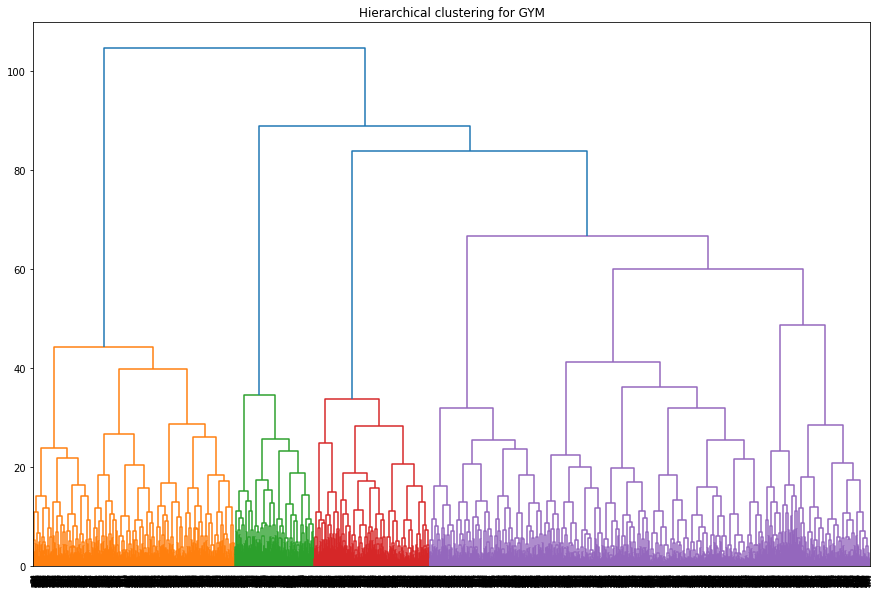

In [32]:
# Plotting dendogram to obtain K
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show()

In [33]:
# Applying 5 clusters to cluster algorithm
km = KMeans(n_clusters = 5)
labels = km.fit_predict(X_sc) # forming a cluster vector

In [34]:
# Adding labeling vector to dataset
churn_data['cluster_km'] = labels
churn_data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster_km
0,True,True,True,True,False,6,True,29,14.227470,5,3,0.020398,0.000000,False,2
1,False,True,False,False,True,12,True,31,113.202938,12,7,1.922936,1.910244,False,0
2,False,True,True,False,True,1,False,28,129.448479,1,2,1.859098,1.736502,False,1
3,False,True,True,True,True,12,True,33,62.669863,12,2,3.205633,3.357215,False,0
4,True,True,True,True,True,1,False,26,198.362265,1,3,1.113884,1.120078,False,2


In [35]:
# Getting the statistics of the mean feature values per cluster 
churn_data.groupby('cluster_km').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.501604,0.944385,0.740107,0.486631,0.901604,11.890909,0.550802,29.917647,164.840890,10.886631,4.697326,1.995918,1.987415,0.022460
1,0.482143,1.000000,0.244643,0.017857,0.900893,1.987500,0.319643,28.231250,131.071537,1.903571,2.428571,1.286383,1.047105,0.523214
2,0.485179,0.998440,0.817473,1.000000,0.900156,3.143526,0.455538,29.182527,141.147858,2.906396,3.672387,1.720163,1.612149,0.249610
3,0.593421,0.971053,0.267105,0.100000,0.903947,2.847368,0.482895,30.189474,162.734136,2.617105,5.157895,2.900996,2.902436,0.064474
4,0.496324,0.000000,0.466912,0.077206,0.915441,2.209559,0.215074,28.483456,133.630215,2.073529,2.781250,1.657657,1.466870,0.450368


<div class="alert alert-info">
    
**Cluster 2** has the lowest churn rate at 2.8%. Almost 80% of them are part of a partner company. They have the highest tendency of being referred by a friend, and they opt for the longest contract periods. They also spend a lot on additional charges and on average have a long lifetime. These users hit the gym the second most.


**Cluster 4** has the second lowest churn rate at 6.8%. They opt for low contract_periods, but tend to join group sessions. They spend the most on additional charges and on average have the longest lifetime. These users hit the gym the most.

**Cluster 3** has the highest churn rate at 51%. **Cluster 1** has a very high churn rate of 44%. **Cluster 0** has an intermediate churn rate of 27%. They all opt for low contract periods, spend the least on additional charges and also hit the gym less than Clusters 2 and 4.
    
NO ONE in **Cluster 0** provides their phone #. The rest of users almost always do.  
NO ONE in **Cluster 1** lives near the gym. The rest of users almost always do.

</div>

<a id='6heading'></a>

## Conclusions and Recommendations

After having analyzed our user data, we divided Model Fitness' clients into 5 seprate clusters. **Clusters 2 and 4** have very low churn rates, while the other three clusters have substantial churn rates.

Our first recommendation to improve **Clusters' 0, 1 and 3** churn rates is to have them participate in more group sessions. Cluster 4 indicates that a higher tendency to join group sessions may improve churn rate. Special offers to attend these sessions could sway people into attending them while also increasing users' additional expenses. Which brings us to our second point.  

Our second recommendation is to have users from **Clusters 0, 1 and 3** spend more on additional services. Their increased investment in Model Fitness could relay a higher sense of conviction, and potentially even increase weekly session amounts.

Our third recommendation, as mentioned in the last point, is the try and make users come more often into the gym. Perhaps a punch card system that rewards consistent attendees would increase average weekly attendance.

Our last recommendation is to try and make users opt in for longer contracts. Temporary special discounts could influence clients into signing longer contracts. For example, Model Fitness could price a 12 month contract just slightly above a 6 month contract during the holiday months, which may create a sense of urgnecy to opt in for.